Take a look at the repository for more information

**Install**

Remember to mount Google Drive for saving the model and continue training later!!!

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

import matplotlib.pyplot as plt
import os
import sys
from PIL import Image

os.chdir('pytorch-CycleGAN-and-pix2pix/')

!pip install -r requirements.txt

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2222 (delta 0), reused 0 (delta 0), pack-reused 2216
Receiving objects: 100% (2222/2222), 8.04 MiB | 13.14 MiB/s, done.
Resolving deltas: 100% (1434/1434), done.
     |████████████████████████████████| 686kB 7.2MB/s 
     |████████████████████████████████| 204kB 10.3MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=5cbe11f2061f8b04ec0f6687866c2a551dd9e5783f76d414032037594a2db885
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=d64fd7034512223830485ead049a7cc21a145c4a7a4a1701125243331e1f724f
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully 

**Datasets**

Download one of the official datasets with:

bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]

Or use your own dataset by creating the appropriate folders and adding in the images.

Create a dataset folder under /dataset for your dataset.
Create subfolders testA, testB, trainA, and trainB under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the testA folder, images you want to transform from b to a (dog2cat) in the testB folder, and do the same for the trainA and trainB folders.


In [11]:
# Horse 2 Zebra
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

# Barcelona 2 Madrid
!pip install -U -q PyDrive
#file_id = "1YE0BuojBKjQG6EjBRPP9mgGtsBwo07pe" # 1st dataset
#file_id = "10tzYgF-1-7NF7pjAS0r25eY55ZUg_SM4" # new dataset (Nuria)
file_id = "1sHe9v6ZXJ6orYH4ADPtho7F6ceR5-AGT" # new dataset 2 (Nuria)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download file
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./datasets/barcelona2madrid.zip')

# Unzip dataset
!unzip ./datasets/barcelona2madrid.zip -d ./datasets/

# Rename folders
!mv ./datasets/fcBarcelona2fcRealMadrid_new2/ ./datasets/barcelona2madrid
!mv ./datasets/barcelona2madrid/TrainA ./datasets/barcelona2madrid/trainA
!mv ./datasets/barcelona2madrid/TrainB ./datasets/barcelona2madrid/trainB
!mv ./datasets/barcelona2madrid/TestA ./datasets/barcelona2madrid/testA
!mv ./datasets/barcelona2madrid/TestB ./datasets/barcelona2madrid/testB


Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/horse2zebra/trainA/n02381460_858.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4625.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_8277.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3366.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2695.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3265.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4053.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_804.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4107.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1995.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3336.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_2403.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_424.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_4726.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_489

In [14]:
# Resize images
img_size = 256
path = './datasets/barcelona2madrid/testA'
print(path)
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".jpg"):
             try:
                img = Image.open(os.path.join(root, file))
                new_img = img.resize((img_size,img_size))
                new_img.save(os.path.join(root, file))
             except:
                os.remove(os.path.join(root, file))

path = './datasets/barcelona2madrid/testB'
print(path)
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".jpg"):
             try:
                img = Image.open(os.path.join(root, file))
                new_img = img.resize((img_size,img_size))
                new_img.save(os.path.join(root, file))
             except:
                os.remove(os.path.join(root, file))

path = './datasets/barcelona2madrid/trainA'
print(path)
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".jpg"):
             try:
                img = Image.open(os.path.join(root, file))
                new_img = img.resize((img_size,img_size))
                new_img.save(os.path.join(root, file))
             except:
                os.remove(os.path.join(root, file))

path = './datasets/barcelona2madrid/trainB'
print(path)
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".jpg"):
             try:
                img = Image.open(os.path.join(root, file))
                new_img = img.resize((img_size,img_size))
                new_img.save(os.path.join(root, file))
             except:
                os.remove(os.path.join(root, file))

./datasets/barcelona2madrid/testA
./datasets/barcelona2madrid/testB
./datasets/barcelona2madrid/trainA
./datasets/barcelona2madrid/trainB


**Pretrained models**

Download one of the official pretrained models with:
bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]

Or add your own pretrained model to ./checkpoints/{NAME}_pretrained/latest_net_G.pt

In [0]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

**Training**

In [16]:
# Train from scratch
!python train.py --crop_size 128 --dataroot ./datasets/barcelona2madrid --name barcelona2madrid --model cycle_gan --batch_size 20 --checkpoints_dir '../drive/My Drive/checkpoints'

# Continue training from previous epoch
#!python train.py --continue_train --epoch_count 31 --crop_size 128 --dataroot ./datasets/barcelona2madrid --name barcelona2madrid --model cycle_gan --batch_size 20 --checkpoints_dir '../drive/My Drive/checkpoints'

----------------- Options ---------------
               batch_size: 20                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ../drive/My Drive/checkpoints 	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 128                           	[default: 256]
                 dataroot: ./datasets/barcelona2madrid   	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                   

Change the --dataroot and --name to your own dataset's path and model's name. Use --gpu_ids 0,1,.. to train on multiple GPUs and --batch_size to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:
Use cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth if you want to transform images from class A to class B and cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth if you want to transform images from class B to class A.

**Testing**

Change the --dataroot and --name to be consistent with your trained model's configuration.

from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix: The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.
For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

**Visualize**

Barcelona2madrid

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ../drive/My Drive/checkpoints 	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/barcelona2madrid/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0  

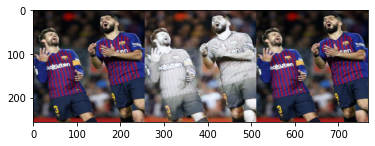

In [21]:
# From domain A to B (barcelona -> madrid)

!cp '../drive/My Drive/checkpoints/barcelona2madrid/100_net_G_A.pth' '../drive/My Drive/checkpoints/barcelona2madrid/latest_net_G.pth'
!python test.py --dataroot datasets/barcelona2madrid/testA --name barcelona2madrid --model test --no_dropout --checkpoints_dir '../drive/My Drive/checkpoints'

im1 = './datasets/barcelona2madrid/testA/1201_Barcelona.jpg'
im2 = './results/barcelona2madrid/test_latest/images/1201_Barcelona_fake.png'
im3 = './results/barcelona2madrid/test_latest/images/1201_Barcelona_real.png'
images = [Image.open(x) for x in [im1, im2, im3]]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

plt.imshow(new_im)

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ../drive/My Drive/checkpoints 	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/barcelona2madrid/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0  

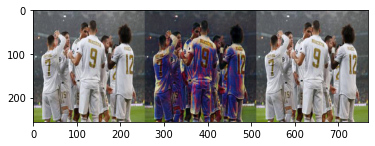

In [20]:
# From domain B to A (madrid -> barcelona)

!cp '../drive/My Drive/checkpoints/barcelona2madrid/100_net_G_B.pth' '../drive/My Drive/checkpoints/barcelona2madrid/latest_net_G.pth'
!python test.py --dataroot datasets/barcelona2madrid/testB --name barcelona2madrid --model test --no_dropout --checkpoints_dir '../drive/My Drive/checkpoints'

im1 = './datasets/barcelona2madrid/testB/1242_RealMadrid.jpg'
im2 = './results/barcelona2madrid/test_latest/images/1242_RealMadrid_fake.png'
im3 = './results/barcelona2madrid/test_latest/images/1242_RealMadrid_real.png'
images = [Image.open(x) for x in [im1, im2, im3]]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

plt.imshow(new_im)

Horse2zebra

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ../drive/My Drive/checkpoints 	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0   

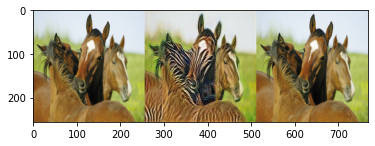

In [0]:
# From domain A to B (horse -> zebra)

!cp '../drive/My Drive/checkpoints/horse2zebra/25_net_G_A.pth' '../drive/My Drive/checkpoints/horse2zebra/latest_net_G.pth'
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra --model test --no_dropout --checkpoints_dir '../drive/My Drive/checkpoints'

im1 = './datasets/horse2zebra/testA/n02381460_1010.jpg'
im2 = './results/horse2zebra/test_latest/images/n02381460_1010_fake.png'
im3 = './results/horse2zebra/test_latest/images/n02381460_1010_real.png'
images = [Image.open(x) for x in [im1, im2, im3]]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

plt.imshow(new_im)

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ../drive/My Drive/checkpoints 	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testB    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0   

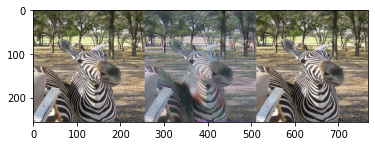

In [0]:
# From domain B to A (zebra -> horse)

!cp '../drive/My Drive/checkpoints/horse2zebra/25_net_G_B.pth' '../drive/My Drive/checkpoints/horse2zebra/latest_net_G.pth'
!python test.py --dataroot datasets/horse2zebra/testB --name horse2zebra --model test --no_dropout --checkpoints_dir '../drive/My Drive/checkpoints'

im1 = './datasets/horse2zebra/testB/n02391049_1000.jpg'
im2 = './results/horse2zebra/test_latest/images/n02391049_1000_fake.png'
im3 = './results/horse2zebra/test_latest/images/n02391049_1000_real.png'
images = [Image.open(x) for x in [im1, im2, im3]]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

plt.imshow(new_im)